## CourseWork Project 2 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/adultcensusincome.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## **EDA and Preprocessing**

### 1. **Data Loading and Cleaning**

Run standard EDA (describe, info, etc…)

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 17.6 MB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
for i in df.columns:
    print(f'{df[i]}: {df[i].unique()}\n')


0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64: [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]

0              ?
1        Private
2              ?
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

0         77053
1        132870
2        186061
3        140359
4        264663
          ...  
32556    310152
32557    257302
32558    154374
32559    151910
32560    201490
Name: fnlwgt, Length: 32561, dtype: int64: [ 77053 132870 186061 ...  3406

Imputation to handle missing values in columns 
- For missing values in:
    - 'workclass' --> use MODE as it is a Categorical Column
    - 'occupation' --> use MODE as it is a Categorical Column
    - 'native.country' --> use MODE

replace '?' with NaN 

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
#make a copy for safety:
df_1 = df.copy()

#replace '?' by NaN:
df_1['workclass'] = df_1['workclass'].replace('?', np.nan)
df_1['occupation'] = df_1['occupation'].replace('?', np.nan)
df_1['native.country'] = df_1['native.country'].replace('?', np.nan)
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
imputer = SimpleImputer(strategy='most_frequent')           #MODE
df_1['workclass'] = imputer.fit_transform(df_1[['workclass']])[:,0]
df_1['occupation'] = imputer.fit_transform(df_1[['occupation']])[:,0]
df_1['native.country'] = imputer.fit_transform(df_1[['native.country']])[:,0]

df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Check the distribution of the target variable 'income' to identify if the dataset is balanced or imbalanced.

In [12]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

> Ratios are NOT close, so the data is **IMBALANCED** 

<Axes: xlabel='income'>

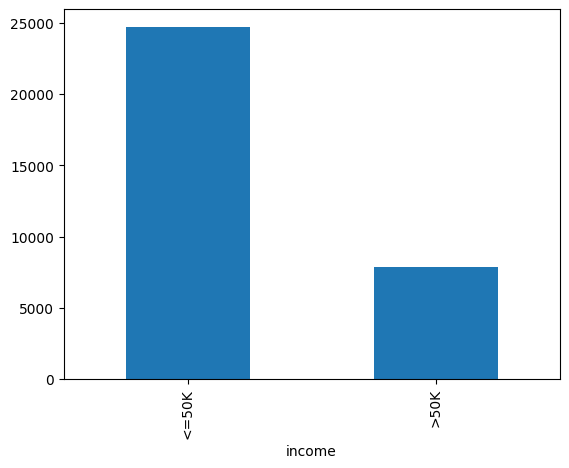

In [13]:
df['income'].value_counts().plot(kind='bar')

### 2. **Univariate Analysis**

Create distribution plots for the following columns: 'income', 'age', 'education.num', and 'education'.

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

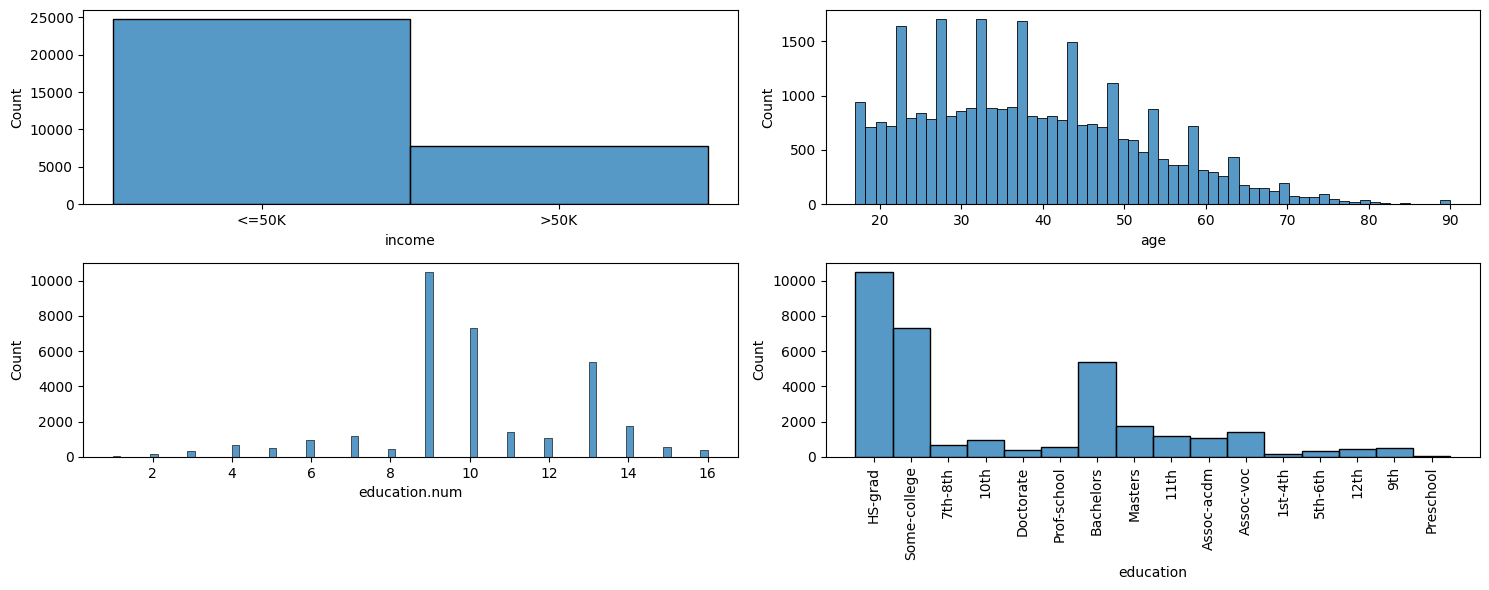

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
axes = axes.flatten()

sns.histplot(data=df_1, x='income', ax=axes[0])
sns.histplot(data=df_1, x='age', ax=axes[1])
sns.histplot(data=df_1, x='education.num', ax=axes[2])
sns.histplot(data=df_1, x='education', ax=axes[3])

plt.xticks(rotation=90)         #rotates x labels by 90 degrees

fig.tight_layout()

Generate a pie chart to visualize the distribution of 'Marital status' based on the column 'marital.status'

In [16]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

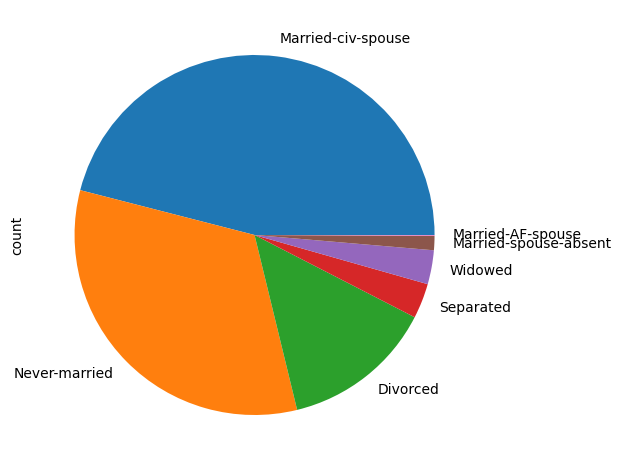

In [17]:
df['marital.status'].value_counts().plot(kind='pie')
plt.tight_layout()

### 3. **Multivariate Analysis with Plotly**

Build a scatter plot using Plotly for 'age' and 'education.num'. Use 'income' for color and 'hours per week' for size.

In [18]:
import plotly.express as px

In [19]:
plt.figure(figsize=(12,6))

px.scatter(data_frame=df_1, x='age', y='education.num', color='income', size='hours.per.week')


<Figure size 1200x600 with 0 Axes>

### 4. **Multivariate Analysis with Seaborn**

Construct a violin plot using Seaborn to analyze 'education' and 'age'. Use 'income' for hue, set split=True, and use
inner='quart'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

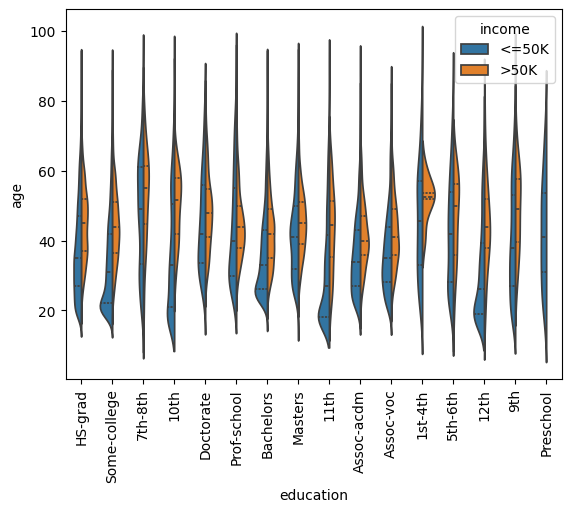

In [20]:
sns.violinplot(data=df_1, x='education', y='age', hue='income',split=True, inner='quart')
plt.xticks(rotation=90)

Create a countplot of 'income' across multiple categorical columns: 'age', 'education', 'marital status', 'race', and 'sex'

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

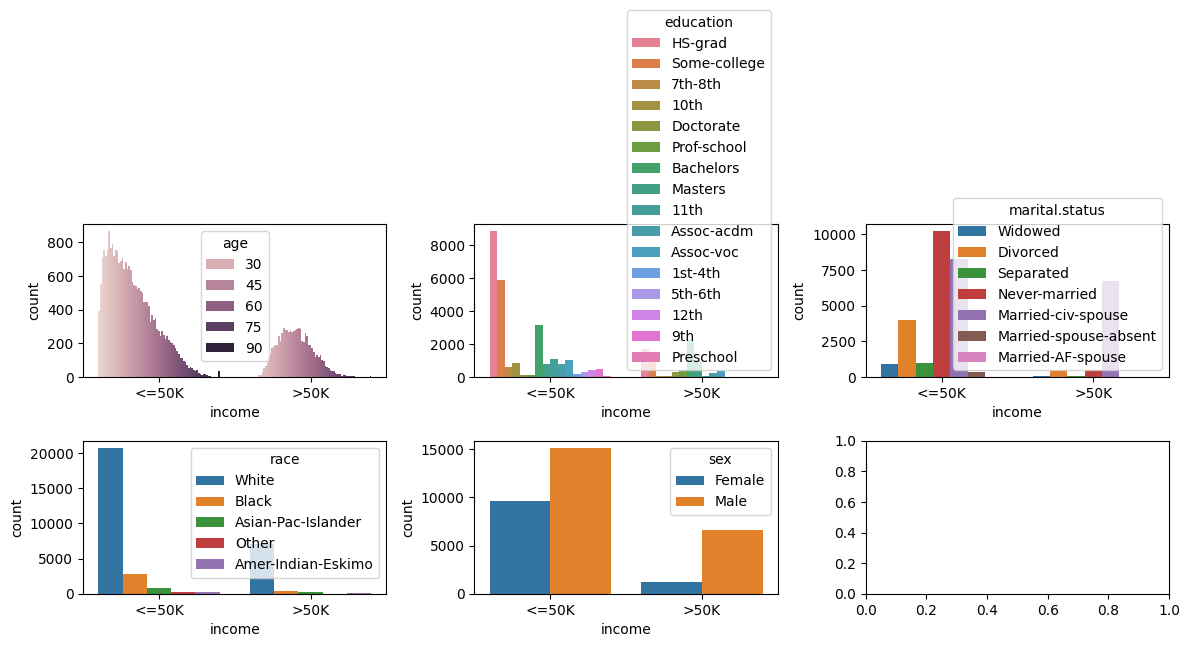

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.countplot(data=df_1, x='income', hue='age', ax=axes[0,0]),
sns.countplot(data=df_1, x='income', hue='education', ax=axes[0,1]),
sns.countplot(data=df_1, x='income', hue='marital.status', ax=axes[0,2]),
sns.countplot(data=df_1, x='income', hue='race', ax=axes[1,0]),
sns.countplot(data=df_1, x='income', hue='sex', ax=axes[1,1])

plt.tight_layout()

Draw a heatmap to visualize the correlation between numeric columns in the dataset

to get only numeric columns:

In [23]:
numeric_cols = df_1.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

build a correlation matrix first:

In [24]:
corr_matrix = df_1.corr(numeric_only=True)
corr_matrix

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: >

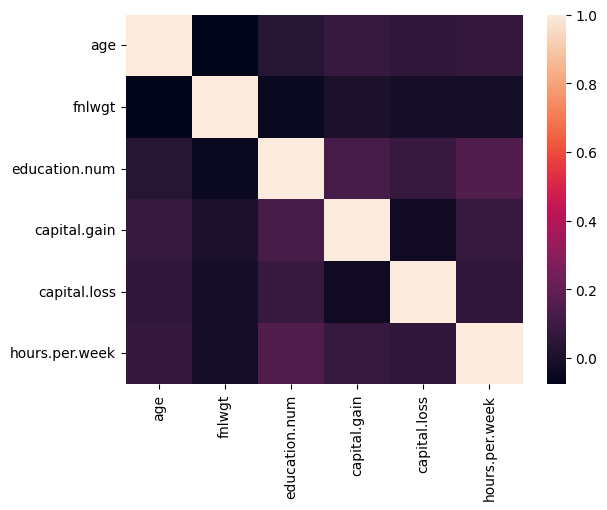

In [25]:
sns.heatmap(corr_matrix)

### 5. **Data Preparation for Modeling**

Encode all categorical columns in the dataset appropriately

In [26]:
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [27]:
df_1['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

- Encoding:
    - workclass, marital.status, occupation, relationship, race, native.country  --> one-hot encoding
    - sex, income --> label encoding
    - education --> ordinal encoding

In [28]:
df_2 = df_1.copy()

Label Encoding:

In [29]:
df_2['sex'] = pd.factorize(df_2['sex'])[0]
df_2['income'] = pd.factorize(df_2['income'])[0]
df_2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


Ordinal Encoding:

In [30]:
df_2['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [31]:
df_2['education'] = df_2['education'].map({'Preschool':0, '1st-4th':1, '5th-6th':2, '7th-8th':3, '9th':4, '10th':5, '11th':6, '12th':7, 'HS-grad':8,
                                            'Some-college':9, 'Assoc-voc':10, 'Assoc-acdm':11, 'Bachelors':12, 'Masters':13, 'Prof-school':14, 'Doctorate':15})

df_2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,8,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,8,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,9,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,3,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,9,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,9,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32557,27,Private,257302,11,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32558,40,Private,154374,8,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32559,58,Private,151910,8,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [32]:
df_2['education'].unique()

array([ 8,  9,  3,  5, 15, 14, 12, 13,  6, 11, 10,  1,  2,  7,  4,  0])

One-hot Encoding:

In [33]:
df_2 = pd.get_dummies(data=df_2, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country'], dtype=int)
df_2.head()

,age,fnlwgt,education,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,8,9,0,0,4356,40,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,8,9,0,0,4356,18,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,9,10,0,0,4356,40,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,3,4,0,0,3900,40,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,9,10,0,0,3900,40,0,0,...,0,0,0,0,0,0,0,1,0,0


Prepare independent variables (X) and dependent variable (Y, 'Income')

In [34]:
X = df_2.drop(columns='income')
y = df_2['income']

### 3. **Feature Scaling and Handling Imbalance**

Perform feature scaling using StandardScaler

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

df_standard_scaling = StandardScaler().fit_transform(X)
df_standard_scaling

array([[ 3.76961234, -1.06799736, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 3.18311167, -0.53916866, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 2.01011032, -0.03521956, -0.03136003, ...,  0.30720846,
        -0.04540836, -0.02217266],
       ...,
       [ 0.10398314, -0.33543266, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266]])

Address class imbalance in the dataset using a technique like SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

smote_model = SMOTE(random_state=42)
X_resampled, y_resampled = smote_model.fit_resample(X_train,y_train)        #apply SMOTE only on train data 

In [38]:
X.shape, X_resampled.shape

((32561, 89), (39488, 89))

### 4. **Model Building and Evaluation**

Split the dataset into training and testing sets with a ratio of 80:20 and random_state=42

Train the following classifers: Logistic Regression, KNN Classifer, SVM Classifer, Naive Bayes Classifer, Decision Tree Classifer

In [39]:
from sklearn.linear_model import LogisticRegression             # logistic regression
from sklearn.neighbors import KNeighborsClassifier              # knn classifier
from sklearn import svm                                         # svm classifier
from sklearn.naive_bayes import GaussianNB                      # naive bayes
from sklearn.tree import DecisionTreeClassifier                 # decision tree

In [40]:
lr_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
nb_model = GaussianNB()
dtc_model = DecisionTreeClassifier()

**Automating Multiple Classifier Models** using a hyperparameter grid setup for multiple combinations:

In [41]:
models = [
    {'name':'Logistic Regression', 'model':LogisticRegression()},
    {'name':'KNN Classifier', 'model':KNeighborsClassifier()},
    {'name':'SVM Classifier', 'model':svm.SVC()},
    {'name':'Naive Bayes', 'model':GaussianNB()},
    {'name':'Decision Tree', 'model':DecisionTreeClassifier()},
          ]

now lets make parameter grid:

In [42]:
# param_grids = {'Logistic Regression':{
#                                         'C':[],
#                                         ''
# }}

In [43]:
lr_model.fit(X_train, y_train)

/home/vinayakgaur07/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [44]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

to get accuracy and f1 score:

In [45]:
from sklearn.metrics import accuracy_score, f1_score

In [46]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.837095040687855

In [47]:
lr_f1_score = f1_score(y_test, y_pred)
lr_f1_score

0.6080531954192834

knn model:

In [48]:
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [49]:
y_knn_pred = knn_model.predict(X_test)

In [50]:
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_accuracy

0.7792108091509289

In [51]:
knn_f1_score = f1_score(y_test, y_knn_pred)
knn_f1_score

0.3952901597981497

svm model:

In [52]:
svm_model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [53]:
y_svm_pred = svm_model.predict(X_test)

In [54]:
svm_accuracy = accuracy_score(y_test, y_svm_pred)
svm_accuracy

0.7959465684016582

In [55]:
svm_f1_score = f1_score(y_test, y_svm_pred)
svm_f1_score

0.24273504273504273

naive bayes:

In [56]:
nb_model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [57]:
y_nb_pred = nb_model.predict(X_test)

In [58]:
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_accuracy

0.7950253339474896

In [59]:
nb_f1_score = f1_score(y_test, y_nb_pred)
nb_f1_score

0.40693025322079074

decision tree classifier

In [60]:
dtc_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [61]:
y_dtc_pred = dtc_model.predict(X_test)
y_dtc_pred

array([1, 0, 1, ..., 1, 0, 0])

In [62]:
dtc_accuracy = accuracy_score(y_test, y_dtc_pred)
dtc_accuracy

0.8168278826961461

In [63]:
dtc_f1_score = f1_score(y_test, y_dtc_pred)
dtc_f1_score

0.6135406543569809

In [64]:
print(f'For Logistic Regression Model: Accuracy Score = {lr_accuracy:.2f} and F1 Score = {lr_f1_score:.2f}')
print(f'For KNN Regression Model: Accuracy Score = {knn_accuracy:.2f} and F1 Score = {knn_f1_score:.2f}')
print(f'For SVM Regression Model: Accuracy Score = {svm_accuracy:.2f} and F1 Score = {svm_f1_score:.2f}')
print(f'For Naive Bayes Model: Accuracy Score = {nb_accuracy:.2f} and F1 Score = {nb_f1_score:.2f}')
print(f'For Decision Tree Regression Model: Accuracy Score = {dtc_accuracy:.2f} and F1 Score = {dtc_f1_score:.2f}')

For Logistic Regression Model: Accuracy Score = 0.84 and F1 Score = 0.61
For KNN Regression Model: Accuracy Score = 0.78 and F1 Score = 0.40
For SVM Regression Model: Accuracy Score = 0.80 and F1 Score = 0.24
For Naive Bayes Model: Accuracy Score = 0.80 and F1 Score = 0.41
For Decision Tree Regression Model: Accuracy Score = 0.82 and F1 Score = 0.61


Compare the results side-by-side in a table to identify the best performing model:

In [82]:
data = {
    'name' : ['Logistic Regression', 'KNN Regression', 'SVM Regression', 'Naive Bayes', 'Decision Tree Regression'],
    'accuracy' : ['0.84', '0.78', '0.80', '0.80', '0.82'],
    'f1' : ['0.61', '0.40', '0.24', '0.41', '0.61']
}

df = pd.DataFrame(data)
df

,name,accuracy,f1
0,Logistic Regression,0.84,0.61
1,KNN Regression,0.78,0.40
2,SVM Regression,0.80,0.24
3,Naive Bayes,0.80,0.41
4,Decision Tree Regression,0.82,0.61


Got some help of ai:

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini','entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_resampled, y_resampled)

best_dt = grid.best_estimator_

y_pred = best_dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4976
           1       0.58      0.62      0.60      1537

    accuracy                           0.80      6513
   macro avg       0.73      0.74      0.74      6513
weighted avg       0.81      0.80      0.81      6513

